In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso,  ElasticNet
from sklearn import ensemble
from sklearn import svm
from xgboost import XGBRegressor


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder



from sklearn.model_selection import RandomizedSearchCV

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel


In [2]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [3]:
# Load data
df = pd.read_csv(URL, sep=",", encoding="utf-8")
df.head()

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
0,3 pokoje z zielonym tarasem i balkonem + MP,759000.0,"Maślice, Fabryczna, Wrocław, dolnośląskie",61.83,12276,3,https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...,pełna własność,do zamieszkania,parter,...,0,0,0,0,1,1,1,0,0,1
1,Maślicka 166 C | mieszkanie K2_2,616161.0,"ul. Maślicka 166, Maślice, Fabryczna, Wrocław,...",67.71,9100,3,https://www.otodom.pl/pl/oferta/maslicka-166-c...,pełna własność,do wykończenia,parter,...,0,0,0,1,0,0,0,0,0,0
2,Bezpieczna/dwustronne/rozkład/co miejskie/piwnica,576000.0,"Bezpieczna okolice, Różanka, Psie Pole, Wrocła...",57.70,9983,3,https://www.otodom.pl/pl/oferta/bezpieczna-dwu...,pełna własność,do zamieszkania,4,...,1,0,0,0,1,1,0,0,0,0
3,Piłsudskiego/ super/ m. miejskie/ balkon /piwnica,470000.0,"ul. marsz. Józefa Piłsudskiego, Przedmieście Ś...",40.00,11750,1,https://www.otodom.pl/pl/oferta/pilsudskiego-s...,Zapytaj,do zamieszkania,3,...,1,0,0,1,0,0,0,0,0,0
4,"Mieszkanie, 61 m², Wrocław",633000.0,"Tarnogaj, Krzyki, Wrocław, dolnośląskie",61.00,10377,3,https://www.otodom.pl/pl/oferta/mieszkanie-61-...,pełna własność,do wykończenia,2,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6645 non-null   object 
 1   prices                                      6645 non-null   float64
 2   location                                    6645 non-null   object 
 3   area                                        6645 non-null   float64
 4   price per square meter                      6645 non-null   int64  
 5   numbers_of_rooms                            6645 non-null   int64  
 6   urls                                        6645 non-null   object 
 7   property_ownership                          6645 non-null   object 
 8   condition_of_property                       6645 non-null   object 
 9   floor                                       6645 non-null   object 
 10  balcon_garde

In [5]:
# Target variable
y = df['prices']

In [6]:
columns_to_remove = ["titles", "prices", "price per square meter", "location", "location_remain", "province", "city", "urls", "balcon_garden_terrace", "utilities", "security", "describe"]
columns_to_remove

['titles',
 'prices',
 'price per square meter',
 'location',
 'location_remain',
 'province',
 'city',
 'urls',
 'balcon_garden_terrace',
 'utilities',
 'security',
 'describe']

In [7]:
# Defining Features
X = df[[cname for cname in df.columns if cname not in columns_to_remove]]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area                                        6645 non-null   float64
 1   numbers_of_rooms                            6645 non-null   int64  
 2   property_ownership                          6645 non-null   object 
 3   condition_of_property                       6645 non-null   object 
 4   floor                                       6645 non-null   object 
 5   amount_of_rent                              2705 non-null   float64
 6   parking_space                               6645 non-null   object 
 7   type_of_heating                             6645 non-null   object 
 8   primary_secondary                           6645 non-null   object 
 9   seller                                      6645 non-null   object 
 10  year_of_cons

In [9]:
# Split data into training and validation data, for both features and target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [10]:
# Get list of categorical variables  
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object')

In [11]:
# Get list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  X_train.select_dtypes(include=numerics).columns
numerical_cols

Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_terrace_dummy_taras', 'utilities_dummy_brak_informacji',
       'utilities_dummy_gaz', 'utilities_dummy_internet',
       'utilities_dummy_kanalizacja', 'utilities_dummy_prad',
       'utilities_dummy_telefon', 'utilities_dummy_telewizja_kablowa',
       'utilities_dummy_woda', 'security_dummy_brak_informacji',
       'security_dummy_domofon_/_wideofon',
       'security_dummy_drzwi_/_okna_antywlamaniowe',
       'security_dummy_monitoring_/_ochrona',
       'security_dummy_rolety_antywlamaniowe',
       'security_dummy_system_alarmowy', 'security_dummy_teren_zamkniety'],
      dtype='object')

In [12]:
X_train.sample(10)

,area,numbers_of_rooms,property_ownership,condition_of_property,floor,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
957,58.00,2,pełna własność,do zamieszkania,4,940.0,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,...,0,0,0,0,0,0,1,0,1,0
4697,68.00,3,pełna własność,do zamieszkania,2,800.0,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,...,0,1,0,0,1,1,1,1,0,0
6595,32.85,2,Zapytaj,do remontu,1,350.0,garaż/miejsce parkingowe,Zapytaj,wtórny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
3761,95.85,4,pełna własność,do wykończenia,2,NaN,garaż/miejsce parkingowe,gazowe,pierwotny,biuro nieruchomości,...,1,1,0,0,1,0,0,0,0,0
2448,56.53,3,Zapytaj,Zapytaj,1,NaN,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,...,0,0,0,0,1,1,1,0,0,0
2851,81.20,3,pełna własność,do zamieszkania,1,1.0,garaż/miejsce parkingowe,gazowe,wtórny,biuro nieruchomości,...,1,1,0,0,1,1,0,0,0,1
448,35.37,1,pełna własność,Zapytaj,3,NaN,Zapytaj,miejskie,wtórny,biuro nieruchomości,...,1,0,0,0,1,0,0,0,0,0
2188,63.30,2,pełna własność,Zapytaj,3,430.0,Zapytaj,gazowe,wtórny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
417,45.00,2,pełna własność,do zamieszkania,2,NaN,garaż/miejsce parkingowe,Zapytaj,wtórny,biuro nieruchomości,...,0,0,0,1,0,0,0,0,0,0
4372,52.70,2,pełna własność,do remontu,4,570.0,Zapytaj,miejskie,wtórny,biuro nieruchomości,...,0,0,0,0,1,0,0,0,0,0


In [13]:
#scoring_metric= 'neg_mean_squared_error'
scoring_metric= 'r2'
#scoring_metric = 'neg_mean_absolute_error'

In [14]:
def plot_valid_pred(y_valid, y_pred, start_index, plot_width):
    start_index = start_index
    plot_width = plot_width
    x_axis = pd.Series(range(start_index, start_index + plot_width, 1))
    y_valid_plot  = y_valid.iloc[:plot_width]
    y_valid_plot = y_valid_plot.reset_index(drop=True)
    y_pred_plot  = y_pred.iloc[:plot_width]
    y_pred_plot = y_pred_plot.reset_index(drop=True)    
    data_preproc = pd.DataFrame({"x_axis": x_axis,
                             "original": y_valid_plot ,
                             "predicted": y_pred_plot})
    sns.lineplot(x="x_axis", y='value', hue='variable', data = pd.melt(data_preproc, ['x_axis']))
    plt.show()
    
# Define function for scoring models
def score_model(model, pipeline, X_train, y_train, X_valid, y_valid, scoring_metric, plot: bool=False):
    pipeline.fit(X_train, y_train)
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_valid = pipeline.predict(X_valid)
    
    print("----------------------------", end="\n\n")
    pprint(model)
    print('\n\nMetrics for training set:')
    print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
    print('MAPE: '+ str(mean_absolute_percentage_error(y_train, y_pred_train)))
    print('MSE: '+ str(mean_squared_error(y_train, y_pred_train)))
    print("Coefficient of determination r2: %.2f" % r2_score(y_train, y_pred_train))

    validation_result = cross_val_score(pipeline, X_train, y_train, cv=10, scoring = scoring_metric)
    print('Cross-validation:', end="\n\n")
    print(f'Metric {scoring_metric} for Cross-validation on training set: ')
    print(validation_result)
    print("Mean: " + str(validation_result.mean()), end="\n\n")

    print('Metrics for validation set:')
    print('MAE: '+ str(mean_absolute_error(y_valid, y_pred_valid)))
    print('MAPE: '+ str(mean_absolute_percentage_error(y_valid, y_pred_valid)))
    print('MSE: '+ str(mean_squared_error(y_valid, y_pred_valid)))
    print("Coefficient of determination r2: %.2f" % r2_score(y_valid, y_pred_valid), end="\n\n")
    

    if plot:
        y_pred_valid = pd.Series(y_pred_valid)
        plot_valid_pred(y_valid, y_pred_valid, 0, 100)
    
    print("----------------------------", end="\n\n")

In [15]:
# Define transformers to be used in pipeline
categorical_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer_1 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_2 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_3 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'most_frequent')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_4 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'constant', fill_value= -10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_5 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=2)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_6 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=5)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_7 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_8 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=20)),
    ('std_scaler', StandardScaler())
    ])
categorical_transformer_list = [categorical_transformer_1, categorical_transformer_2]
numerical_transformer_list = [numerical_transformer_1, numerical_transformer_2, numerical_transformer_3, numerical_transformer_4, numerical_transformer_5, numerical_transformer_6, numerical_transformer_7, numerical_transformer_8]


In [19]:
params_from_GS = {'model__subsample': 0.8, 'model__sampling_method': 'uniform', 'model__n_estimators': 650, 'model__min_split_loss': 1000,  'model__min_child_weight': 0.015, 'model__max_leaves': 100, 'model__max_depth': 15, 'model__learning_rate': 0.07, 'model__colsample_bytree': 0.75, 'model__booster': 'gbtree'}
# Remove 'model__' prefix
params = {k.replace('model__', ''): v for k, v in params_from_GS.items()}
pprint(params)

{'booster': 'gbtree',
 'colsample_bytree': 0.75,
 'learning_rate': 0.07,
 'max_depth': 15,
 'max_leaves': 100,
 'min_child_weight': 0.015,
 'min_split_loss': 1000,
 'n_estimators': 650,
 'sampling_method': 'uniform',
 'subsample': 0.8}


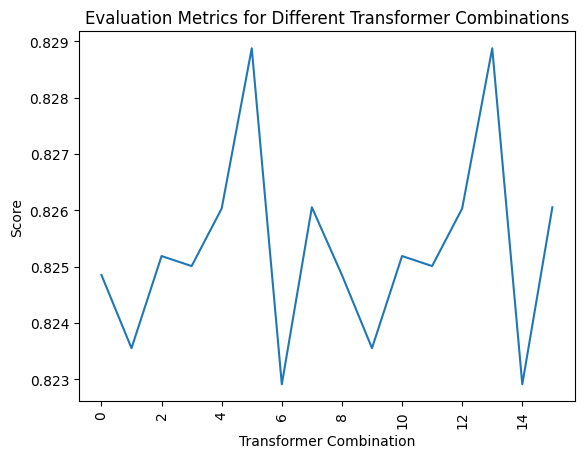

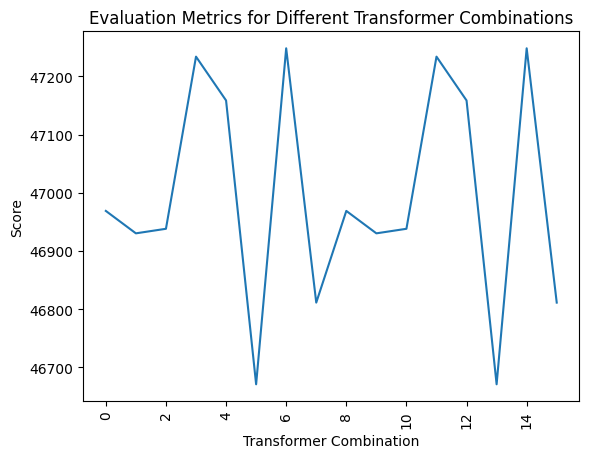

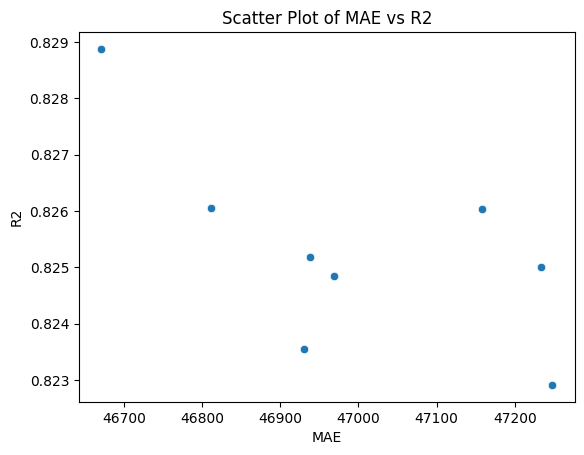

Best Transformer Combination:
Categorical Transformer: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])
Numerical Transformer: Pipeline(steps=[('imputer_num', KNNImputer()),
                ('std_scaler', StandardScaler())])


In [20]:
# Initialize lists to store evaluation metrics
mae_scores = []
mape_scores = []
mse_scores = []
r2_scores = []

# Iterate over transformers
for categorical_transformer in categorical_transformer_list:
    for numerical_transformer in numerical_transformer_list:
        preprocessor = ColumnTransformer(transformers=[
                                            ('num', numerical_transformer, numerical_cols),
                                            ('cat', categorical_transformer, categorical_cols)
                                        ])
        model = XGBRegressor(**params, n_jobs=-1)
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        # Fit the pipeline and calculate evaluation metrics
        pipeline.fit(X_train, y_train)
        y_pred_valid = pipeline.predict(X_valid)
        mae_scores.append(mean_absolute_error(y_valid, y_pred_valid))
        mape_scores.append(mean_absolute_percentage_error(y_valid, y_pred_valid))
        mse_scores.append(mean_squared_error(y_valid, y_pred_valid))
        r2_scores.append(r2_score(y_valid, y_pred_valid))

# Create a dataframe to store the scores
scores_df = pd.DataFrame({'MAE': mae_scores, 'MAPE': mape_scores, 'MSE': mse_scores, 'R2': r2_scores})

# Plot the scores 
sns.lineplot(data=scores_df['R2'])
plt.xlabel('Transformer Combination')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Transformer Combinations')
plt.xticks(rotation=90)
plt.show()
sns.lineplot(data=scores_df['MAE'])
plt.xlabel('Transformer Combination')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Transformer Combinations')
plt.xticks(rotation=90)
plt.show()
sns.scatterplot(data=scores_df, x='MAE', y='R2')
plt.xlabel('MAE')
plt.ylabel('R2')
plt.title('Scatter Plot of MAE vs R2')
plt.show()

best_index = scores_df['R2'].idxmax()
best_categorical_transformer = categorical_transformer_list[best_index // len(numerical_transformer_list)]
best_numerical_transformer = numerical_transformer_list[best_index % len(numerical_transformer_list)]

print("Best Transformer Combination:")
print("Categorical Transformer:", best_categorical_transformer)
print("Numerical Transformer:", best_numerical_transformer)


# In data are values like "brak informacji" or "Zapytaj" wich are not NaN but should be treated as NaN. I will replace them with NaN and then check how will work some imputers.

In [23]:
for column in X_train.columns:
    X_train.loc[X_train[column] == "brak informacji", column] = np.nan
    X_train.loc[X_train[column] == "Zapytaj", column] = np.nan
X_train
for column in X_valid.columns:
    X_valid.loc[X_valid[column] == "brak informacji", column] = np.nan
    X_valid.loc[X_valid[column] == "Zapytaj", column] = np.nan
X_valid.head()

,area,numbers_of_rooms,property_ownership,condition_of_property,floor,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
3706,60.50,3.0,pełna własność,do wykończenia,NaN,NaN,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1670,35.40,2.0,pełna własność,NaN,3,NaN,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5066,103.00,5.0,pełna własność,do zamieszkania,1,250.0,garaż/miejsce parkingowe,gazowe,wtórny,biuro nieruchomości,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4416,73.65,3.0,pełna własność,do wykończenia,2,520.0,NaN,NaN,wtórny,biuro nieruchomości,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
495,28.53,1.0,pełna własność,do wykończenia,6,NaN,garaż/miejsce parkingowe,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
categorical_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer_1 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_2 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_3 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'most_frequent')),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_4 = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'constant', fill_value= -10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_5 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=2)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_6 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=5)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_7 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=10)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_8 = Pipeline(steps=[
    ('imputer_num', KNNImputer(n_neighbors=20)),
    ('std_scaler', StandardScaler())
    ])
numerical_transformer_9 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=20,
        max_iter=10,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])

numerical_transformer_10 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=5,
        max_iter=10,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])

numerical_transformer_11 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=20,
        max_iter=1,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])

numerical_transformer_12 = Pipeline(steps=[
    ('imputer_num', IterativeImputer(
        missing_values = np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=5,
        max_iter=1,
        sample_posterior=True,
    )),
    ('std_scaler', StandardScaler())
    ])

categorical_transformer_list = [categorical_transformer_1, categorical_transformer_2]
numerical_transformer_list = [numerical_transformer_1, numerical_transformer_2, numerical_transformer_3, numerical_transformer_4, numerical_transformer_5, numerical_transformer_6, numerical_transformer_7, numerical_transformer_8, numerical_transformer_9, numerical_transformer_10, numerical_transformer_11, numerical_transformer_12]

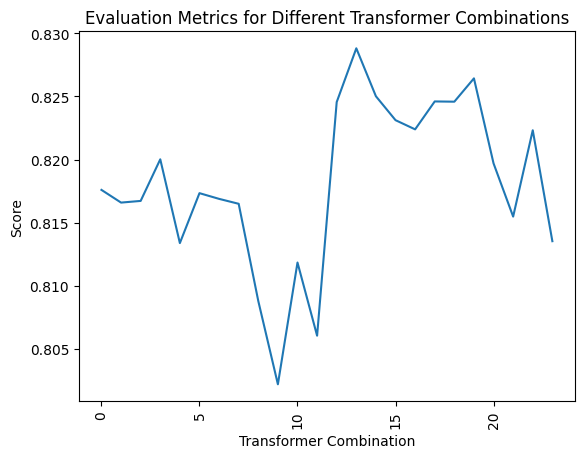

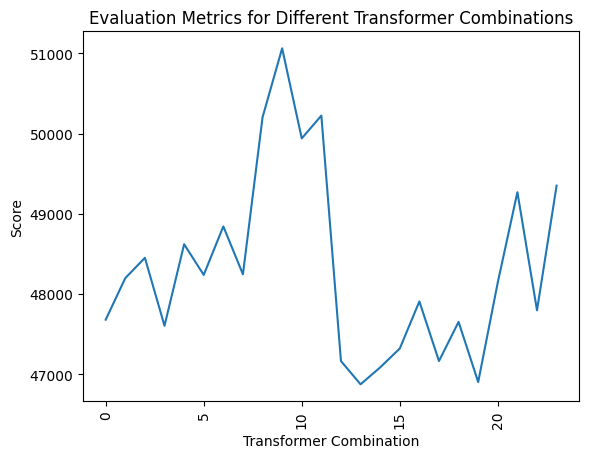

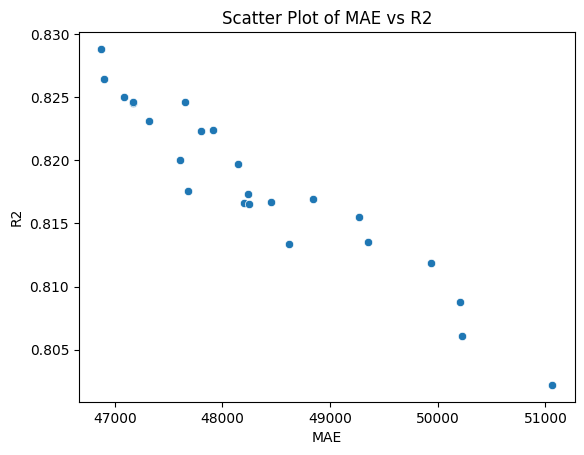

Best Transformer Combination:
Categorical Transformer: Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])
Numerical Transformer: Pipeline(steps=[('imputer_num', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])


In [25]:


# Initialize lists to store evaluation metrics
mae_scores = []
mape_scores = []
mse_scores = []
r2_scores = []

# Iterate over transformers
for categorical_transformer in categorical_transformer_list:
    for numerical_transformer in numerical_transformer_list:
        preprocessor = ColumnTransformer(transformers=[
                                            ('num', numerical_transformer, numerical_cols),
                                            ('cat', categorical_transformer, categorical_cols)
                                        ])
        model = XGBRegressor(subsample=0.85, sampling_method='uniform', n_jobs=-1, n_estimators=700, min_split_loss=None, min_child_weight=0.001, max_leaves=10000, max_depth=7, learning_rate=0.07, colsample_bytree=0.75, booster='gbtree')
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        # Fit the pipeline and calculate evaluation metrics
        pipeline.fit(X_train, y_train)
        y_pred_valid = pipeline.predict(X_valid)
        mae_scores.append(mean_absolute_error(y_valid, y_pred_valid))
        mape_scores.append(mean_absolute_percentage_error(y_valid, y_pred_valid))
        mse_scores.append(mean_squared_error(y_valid, y_pred_valid))
        r2_scores.append(r2_score(y_valid, y_pred_valid))

# Create a dataframe to store the scores
scores_df = pd.DataFrame({'MAE': mae_scores, 'MAPE': mape_scores, 'MSE': mse_scores, 'R2': r2_scores})

sns.lineplot(data=scores_df['R2'])
plt.xlabel('Transformer Combination')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Transformer Combinations')
plt.xticks(rotation=90)
plt.show()
sns.lineplot(data=scores_df['MAE'])
plt.xlabel('Transformer Combination')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Transformer Combinations')
plt.xticks(rotation=90)
plt.show()
# Plot the scores as scatter plots
sns.scatterplot(data=scores_df, x='MAE', y='R2')
plt.xlabel('MAE')
plt.ylabel('R2')
plt.title('Scatter Plot of MAE vs R2')
plt.show()

best_index = scores_df['R2'].idxmax()
best_categorical_transformer = categorical_transformer_list[best_index // len(numerical_transformer_list)]
best_numerical_transformer = numerical_transformer_list[best_index % len(numerical_transformer_list)]

print("Best Transformer Combination:")
print("Categorical Transformer:", best_categorical_transformer)
print("Numerical Transformer:", best_numerical_transformer)



# Best Transformer Combination:

In [ ]:
# Categorical Transformer: Pipeline(steps=[('imputer',
#                  SimpleImputer(fill_value='missing', strategy='constant')),
#                 ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# Numerical Transformer: Pipeline(steps=[('imputer_num', SimpleImputer(strategy='median')),
#                 ('std_scaler', StandardScaler())])

# Build the final pipeline

In [28]:
# Load data
df = pd.read_csv(URL, sep=",", encoding="utf-8")
df.head()

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,...,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
0,3 pokoje z zielonym tarasem i balkonem + MP,759000.0,"Maślice, Fabryczna, Wrocław, dolnośląskie",61.83,12276,3,https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...,pełna własność,do zamieszkania,parter,...,0,0,0,0,1,1,1,0,0,1
1,Maślicka 166 C | mieszkanie K2_2,616161.0,"ul. Maślicka 166, Maślice, Fabryczna, Wrocław,...",67.71,9100,3,https://www.otodom.pl/pl/oferta/maslicka-166-c...,pełna własność,do wykończenia,parter,...,0,0,0,1,0,0,0,0,0,0
2,Bezpieczna/dwustronne/rozkład/co miejskie/piwnica,576000.0,"Bezpieczna okolice, Różanka, Psie Pole, Wrocła...",57.70,9983,3,https://www.otodom.pl/pl/oferta/bezpieczna-dwu...,pełna własność,do zamieszkania,4,...,1,0,0,0,1,1,0,0,0,0
3,Piłsudskiego/ super/ m. miejskie/ balkon /piwnica,470000.0,"ul. marsz. Józefa Piłsudskiego, Przedmieście Ś...",40.00,11750,1,https://www.otodom.pl/pl/oferta/pilsudskiego-s...,Zapytaj,do zamieszkania,3,...,1,0,0,1,0,0,0,0,0,0
4,"Mieszkanie, 61 m², Wrocław",633000.0,"Tarnogaj, Krzyki, Wrocław, dolnośląskie",61.00,10377,3,https://www.otodom.pl/pl/oferta/mieszkanie-61-...,pełna własność,do wykończenia,2,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Target variable
y = df['prices']

In [30]:
columns_to_remove = ["titles", "prices", "price per square meter", "location", "location_remain", "province", "city", "urls", "balcon_garden_terrace", "utilities", "security", "describe"]
columns_to_remove

['titles',
 'prices',
 'price per square meter',
 'location',
 'location_remain',
 'province',
 'city',
 'urls',
 'balcon_garden_terrace',
 'utilities',
 'security',
 'describe']

In [31]:
# Defining Features
X = df[[cname for cname in df.columns if cname not in columns_to_remove]]

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area                                        6645 non-null   float64
 1   numbers_of_rooms                            6645 non-null   int64  
 2   property_ownership                          6645 non-null   object 
 3   condition_of_property                       6645 non-null   object 
 4   floor                                       6645 non-null   object 
 5   amount_of_rent                              2705 non-null   float64
 6   parking_space                               6645 non-null   object 
 7   type_of_heating                             6645 non-null   object 
 8   primary_secondary                           6645 non-null   object 
 9   seller                                      6645 non-null   object 
 10  year_of_cons

In [33]:
# Split data into training and validation data, for both features and target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [34]:
# Get list of categorical variables  
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material', 'district'],
      dtype='object')

In [35]:
# Get list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  X_train.select_dtypes(include=numerics).columns
numerical_cols

Index(['area', 'numbers_of_rooms', 'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_terrace_dummy_taras', 'utilities_dummy_brak_informacji',
       'utilities_dummy_gaz', 'utilities_dummy_internet',
       'utilities_dummy_kanalizacja', 'utilities_dummy_prad',
       'utilities_dummy_telefon', 'utilities_dummy_telewizja_kablowa',
       'utilities_dummy_woda', 'security_dummy_brak_informacji',
       'security_dummy_domofon_/_wideofon',
       'security_dummy_drzwi_/_okna_antywlamaniowe',
       'security_dummy_monitoring_/_ochrona',
       'security_dummy_rolety_antywlamaniowe',
       'security_dummy_system_alarmowy', 'security_dummy_teren_zamkniety'],
      dtype='object')

In [36]:
categorical_transformer =  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                           ('onehot', OneHotEncoder(handle_unknown='ignore'))])
                                         
numerical_transformer =  Pipeline(steps=[('imputer_num', KNNImputer()),
                                         ('std_scaler', StandardScaler())])

----------------------------

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=100,
             min_child_weight=0.015, min_split_loss=1000, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=650,
             n_jobs=-1, num_parallel_tree=None, ...)


Metrics for training set:
MAE: 6087.3840815462745
MAPE: 0.00943272672829975
MSE: 76328689.30781439
Coefficient of determination r2: 1.00
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.85056646 0.8

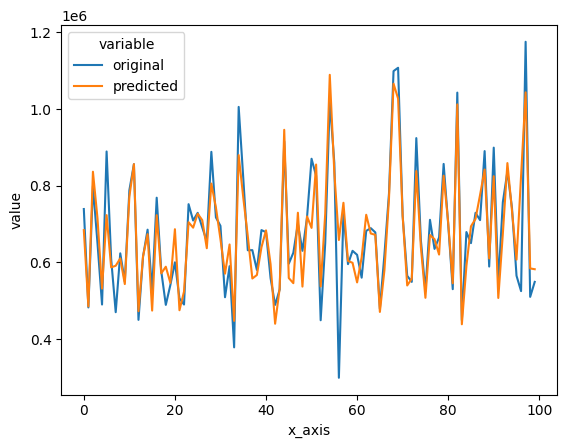

----------------------------



In [38]:
preprocessor = ColumnTransformer(transformers=[
                                            ('num', numerical_transformer, numerical_cols),
                                            ('cat', categorical_transformer, categorical_cols)
                                        ])
model = XGBRegressor(**params, n_jobs=-1)
pipeline_final_model = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('model', model)])

score_model(model, pipeline_final_model, X_train, y_train, X_valid, y_valid, scoring_metric, plot=True)

# Final Results

In [ ]:
Metrics for training set:
MAE: 6087.3840815462745
MAPE: 0.00943272672829975
MSE: 76328689.30781439
Coefficient of determination r2: 1.00
Cross-validation:

Metric r2 for Cross-validation on training set: 
[0.85056646 0.80022851 0.82241104 0.83609117 0.84853936 0.84353463
 0.826731   0.85798884 0.79329722 0.81660064]
Mean: 0.8295988884461117

Metrics for validation set:
MAE: 46670.98802671182
MAPE: 0.07191671317199402
MSE: 5191473901.039937
Coefficient of determination r2: 0.83